Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook from the previous assignment, reproduce the pop1 and pop2 populations and samples, using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.



For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.

1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

2. Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

3. Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1.

In [2]:
# Generate the populations
pop1 = np.random.binomial(n=10, p=0.2, size=10000)
pop2 = np.random.binomial(n=10, p=0.5, size=10000)

# Sampling
sample1 = np.random.choice(pop1, size=1000, replace=True)
sample2 = np.random.choice(pop2, size=1000, replace=True)

In [3]:
# Calculate mean, std of the samples
print('sample1 - mean:', sample1.mean())
print('sample2 - mean:', sample2.mean())
print('sample1 - std:', sample1.std())
print('sample2 - std:', sample2.std())

sample1 - mean: 1.978
sample2 - mean: 5.008
sample1 - std: 1.2212763815
sample2 - std: 1.57351072446


In [4]:
# Compute the difference between the two samples' means
diff = sample2.mean() - sample1.mean()
print('difference between the means:', diff)

# Compute the standard error
size = np.array([len(sample1), len(sample2)])
std = np.array([sample1.std(), sample2.std()])
diff_se = (sum(std**2 / size))**0.5
print('standard error:', diff_se)

# T-value
print('T-value:', diff/diff_se)

difference between the means: 3.03
standard error: 0.0629877130876
T-value: 48.1046199564


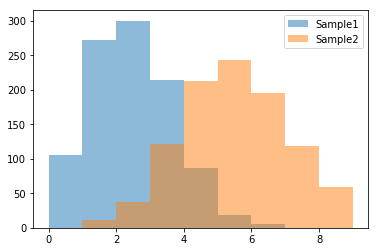

In [12]:
# Plot the histograms
plt.hist(sample1, bins=range(10), alpha=0.5, label='Sample1')
plt.hist(sample2, bins=range(10), alpha=0.5, label='Sample2')
plt.legend()
plt.show()

In [5]:
# Compute the T-value and P-value with 'ttest_ind' function
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=48.080561630343198, pvalue=0.0)


In [7]:
# Decreasing sampling size to 20
# Sampling
sample1D = np.random.choice(pop1, size=20, replace=True)
sample2D = np.random.choice(pop2, size=20, replace=True)

# Calculate mean, std of the samples
print('sample1D - mean:', sample1D.mean())
print('sample2D - mean:', sample2D.mean())
print('sample1D - std:', sample1D.std())
print('sample2D - std:', sample2D.std())

sample1D - mean: 1.6
sample2D - mean: 4.6
sample1D - std: 1.2409673646
sample2D - std: 1.35646599663


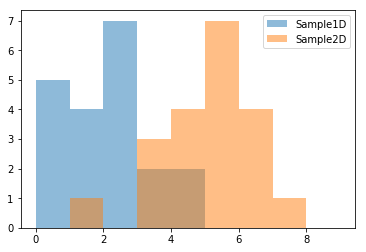

In [13]:
# Plot the histograms
plt.hist(sample1D, bins=range(10), alpha=0.5, label='Sample1D')
plt.hist(sample2D, bins=range(10), alpha=0.5, label='Sample2D')
plt.legend()
plt.show()

In [8]:
# Compute the T-value and P-value with 'ttest_ind' function of the decreased samples
print(ttest_ind(sample2D, sample1D, equal_var=False))

Ttest_indResult(statistic=7.1127853880411251, pvalue=1.8081958544587097e-08)


The shapes of the histograms of the decreased samples are more rough. The means of the decreased samples change a little bit. However, the standard deviations of the decreased change a lot. Furthermore, the T-value decreases, but the P-value increases in the decreased.

2.

In [15]:
# Change the probability of pop1 to 0.3
pop1 = np.random.binomial(n=10, p=0.3, size=10000)
# Sample from the new pop1
sample1 = np.random.choice(pop1, size=1000, replace=True)

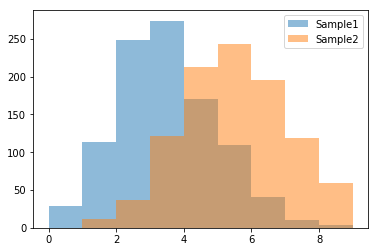

In [16]:
# Plot the histograms
plt.hist(sample1, bins=range(10), alpha=0.5, label='Sample1')
plt.hist(sample2, bins=range(10), alpha=0.5, label='Sample2')
plt.legend()
plt.show()

In [17]:
# Compute the T-value and P-value with 'ttest_ind' function
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=29.161817396056644, pvalue=5.4891377432766934e-156)


In [18]:
# Change the probability of pop1 to 0.4
pop1 = np.random.binomial(n=10, p=0.4, size=10000)
# Sample from the new pop1
sample1 = np.random.choice(pop1, size=1000, replace=True)

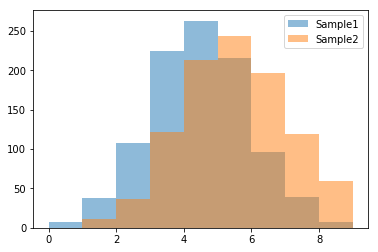

In [19]:
# Plot the histograms
plt.hist(sample1, bins=range(10), alpha=0.5, label='Sample1')
plt.hist(sample2, bins=range(10), alpha=0.5, label='Sample2')
plt.legend()
plt.show()

In [20]:
# Compute the T-value and P-value with 'ttest_ind' function
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=15.092355279749706, pvalue=8.1687673003971921e-49)


As the probabilities of the populations become closer, the t-value decreases and the p-value is increased. It means the difference betewwen the two populations are smaller and smaller.


3. 

In [27]:
# Generate new populations from lognormal distribution
pop_new = np.random.lognormal(mean=5, sigma=0.2, size=10000)
print('The mean of the lognormal distribution:', np.exp(5 + 0.2**2/2))

The mean of the lognormal distribution: 151.411303794


In [ ]:
# Make sample with size 100
sample_new = np.random.choice(pop_new, size = 100)
# mean of the sample
print('sample_new - mean:', sample_new.mean())

In [23]:
# Make sample with size 1000
sample_new = np.random.choice(pop_new, size = 1000)
# mean of the sample
print('sample_new - mean:', sample_new.mean())

sample_new - mean: 152.522491222


In [24]:
# Make sample with size 10000
sample_new = np.random.choice(pop_new, size = 10000)
# mean of the sample
print('sample_new - mean:', sample_new.mean())

sample_new - mean: 151.005083691


As the sample size increases, mean of the sample becomes similar to the true mean of population according the Central limit theorem.